In [3]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [42]:
(train, val, test), info = tfds.load('fashion_mnist',
split=['train[:80%]','train[80%:]','test'],
with_info=True,
as_supervised=True)   

In [43]:
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='C:\\Users\\kazuy\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-077

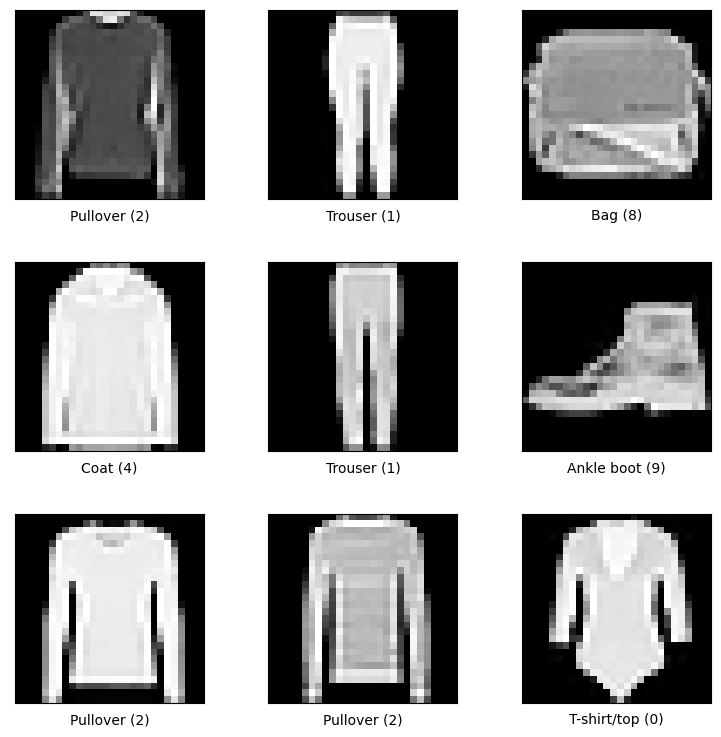

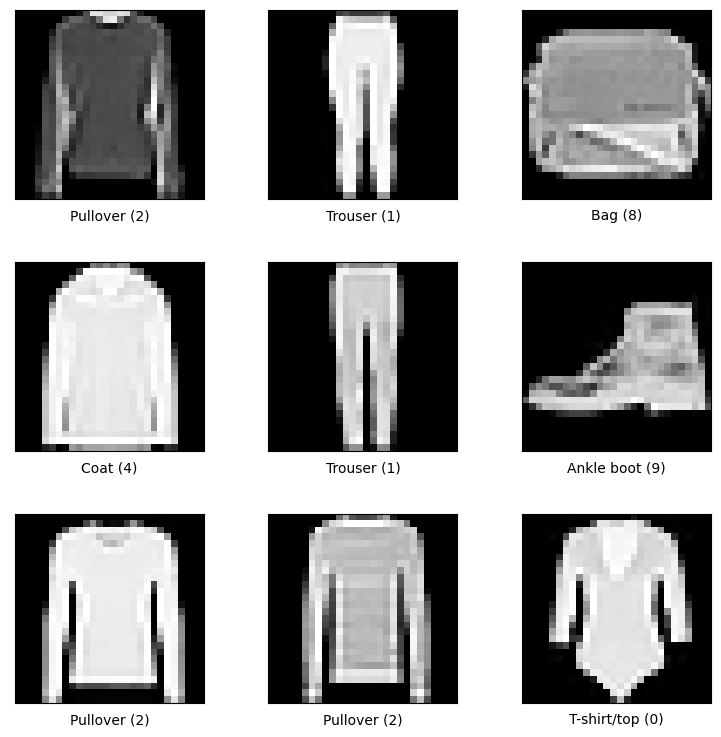

In [44]:
tfds.show_examples(train,info)

In [45]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255, label
    
train = train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train = train.cache()
train = train.batch(128)
train = train.prefetch(tf.data.AUTOTUNE)

val = val.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
val = val.cache()
val = val.batch(128)
val = val.prefetch(tf.data.AUTOTUNE)

test = test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test = test.cache()
test = test.batch(128)
test = test.prefetch(tf.data.AUTOTUNE)

In [46]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=[28,28,1]),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [47]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

In [48]:
history = model.fit(
    train, 
    epochs=100,
    validation_data=val
)

Epoch 1/10
375/375 [==============================] - 21s 55ms/step - loss: 0.5001 - accuracy: 0.8288 - val_loss: 0.3415 - val_accuracy: 0.8784
Epoch 2/10
375/375 [==============================] - 18s 48ms/step - loss: 0.3271 - accuracy: 0.8845 - val_loss: 0.2983 - val_accuracy: 0.8925
Epoch 3/10
375/375 [==============================] - 18s 49ms/step - loss: 0.2825 - accuracy: 0.8995 - val_loss: 0.2733 - val_accuracy: 0.9020
Epoch 4/10
375/375 [==============================] - 19s 51ms/step - loss: 0.2531 - accuracy: 0.9088 - val_loss: 0.2592 - val_accuracy: 0.9075
Epoch 5/10
375/375 [==============================] - 19s 50ms/step - loss: 0.2302 - accuracy: 0.9173 - val_loss: 0.2510 - val_accuracy: 0.9083
Epoch 6/10
375/375 [==============================] - 18s 47ms/step - loss: 0.2107 - accuracy: 0.9251 - val_loss: 0.2461 - val_accuracy: 0.9114
Epoch 7/10
375/375 [==============================] - 16s 44ms/step - loss: 0.1940 - accuracy: 0.9318 - val_loss: 0.2434 - val_accuracy:

In [54]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']

x_label = range(len(acc_train))


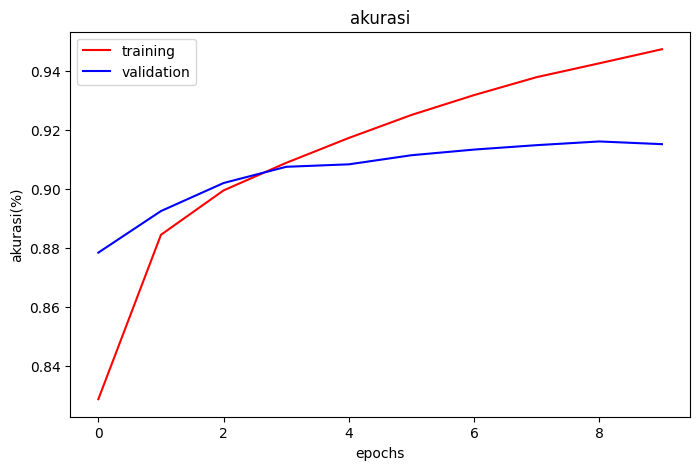

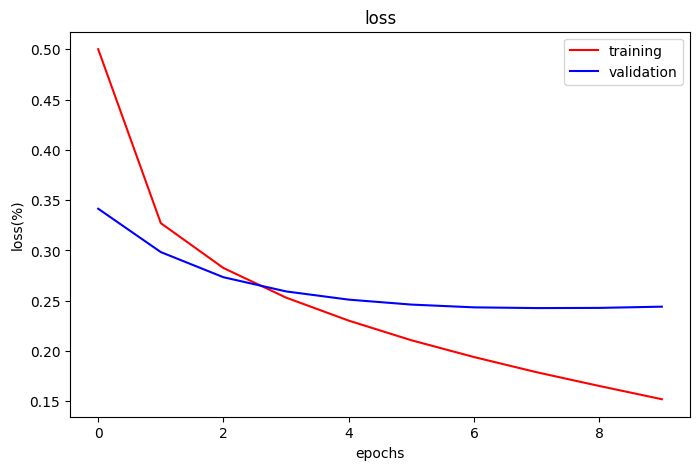

In [53]:
plt.figure(1, figsize=(8,5))
plt.plot(x_label, acc_train, c='r', label='training')
plt.plot(x_label, acc_val, c='b', label='validation')
plt.title('akurasi')
plt.ylabel('akurasi(%)')
plt.xlabel('epochs')
plt.legend()

plt.figure(2, figsize=(8,5))
plt.plot(x_label, loss_train, c='r', label='training')
plt.plot(x_label, loss_val, c='b', label='validation')
plt.title('loss')
plt.ylabel('loss(%)')
plt.xlabel('epochs')
plt.legend()

plt.show()


In [55]:
model.evaluate(test)

79/79 [==============================] - 2s 20ms/step - loss: 0.2750 - accuracy: 0.9070


[0.2750173509120941, 0.9070000052452087]

In [57]:
classes = info.features['label'].names

In [60]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [62]:
gambar = []
label = []

for img,lb in test:
    gambar.append(img)
    label.append(lb)

In [63]:
hasil = model.predict(gambar[1])

4/4 [==============================] - 0s 3ms/step


In [65]:
len(hasil)

128

Text(0.5, 0, 'Sneaker 98.15585017204285%')

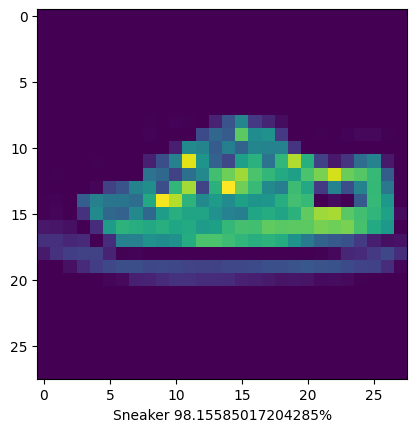

In [84]:
plt.imshow(gambar[1][50])
plt.xlabel(f'{classes[tf.argmax(hasil[50])]} {hasil[50][tf.argmax(hasil[50])]*100}%')